# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [825]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
import json
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [826]:
# Read your api key environment variable
load_dotenv("key.env")

True

In [827]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [828]:
# Fetch the Bitcoin news articles
## fetching top headlines
bitcoin_headlines = newsapi.get_top_headlines(q="Bitcoin", language="en", country="us")
bitcoin_headlines
###fetching = dverything
all_bitcoin_articles = newsapi.get_everything(q='Bitcoin',
                                              sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-03-09',
                                      to='2022-03-08',
                                      language='en',
                                      sort_by='relevancy',)




In [829]:
# Fetch the Ethereum news articles
###fetching ethereum top headlines
ethereum_headlines = newsapi.get_top_headlines(q="Ethereum", language="en", country="us")
ethereum_headlines
###fetching everything 
all_eth_articles = newsapi.get_everything(q='ethereum',
                                              sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-03-09',
                                      to='2022-03-08',
                                      language='en',
                                      sort_by='relevancy',)


type(all_eth_articles)

dict

In [830]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in all_bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_sentiment_df.head()

            

,date,text,compound,positive,negative,neutral
0,2022-03-09,The US is moving to craft new rules to govern ...,-0.7003,0.000,0.153,0.847
1,2022-03-09,"Justin Sun, a budding Chinese cryptocurrency m...",0.0000,0.000,0.000,1.000
2,2022-03-09,The first plan for crypto regulation across mu...,0.4588,0.121,0.000,0.879
3,2022-03-09,The Biden White House showed off a new Executi...,0.0000,0.000,0.000,1.000


In [831]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in all_eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sentiment_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sntiment_df = eth_sentiment_df[cols]

eth_sentiment_df.head()

            
            

,text,date,compound,positive,negative,neutral
0,1.6 million tokens were pledged towards keepin...,2022-03-09,0.0000,0.000,0.0,1.000
1,Behance is adding support for the Polygon bloc...,2022-03-09,0.6597,0.157,0.0,0.843
2,The first plan for crypto regulation across mu...,2022-03-09,0.4588,0.121,0.0,0.879
3,Decentralized finance (DeFi) is one of the hot...,2022-03-08,0.0000,0.000,0.0,1.000


In [832]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,compound,positive,negative,neutral
count,4.000000,4.00000,4.00000,4.000000
mean,-0.060375,0.03025,0.03825,0.931500
std,0.478308,0.06050,0.07650,0.080169
min,-0.700300,0.00000,0.00000,0.847000
25%,-0.175075,0.00000,0.00000,0.871000
50%,0.000000,0.00000,0.00000,0.939500
75%,0.114700,0.03025,0.03825,1.000000
max,0.458800,0.12100,0.15300,1.000000


In [833]:
# Describe the Ethereum Sentiment
eth_df.describe()


,compound,positive,negative,neutral
count,4.000000,4.000000,4.0,4.000000
mean,0.279625,0.069500,0.0,0.930500
std,0.333137,0.081586,0.0,0.081586
min,0.000000,0.000000,0.0,0.843000
25%,0.000000,0.000000,0.0,0.870000
50%,0.229400,0.060500,0.0,0.939500
75%,0.509025,0.130000,0.0,1.000000
max,0.659700,0.157000,0.0,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: at the moment of the analysis the mena positive scote of Eth is higher at 0.069500 while the bitcoin is 0.03025.

Q: Which coin had the highest compound score?

A: Eth had the higest compound score with the min of 0.000 and the max of 0.659700
    Bitcoin had a lower compound score with a min of -0.7000300 and the max of 0.458800

Q. Which coin had the highest positive score?

A: Eth had a higher max positive score of 0.1570000
and Bitcoin had a max positive score of 0.121000 


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [834]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
nltk.download("stopwords")
#nltk.downlaod("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [835]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [836]:
###transforming my json data, lowering and tokenizings the str and
str_bitcoin_articles = json.dumps(all_bitcoin_articles)
bitcoin_sentence = sent_tokenize(str_bitcoin_articles)
bitcoin_sentence = json.dumps(bitcoin_sentence)
bitcoin_words = [w.lower() for w in word_tokenize(bitcoin_sentence)]
bitcoin_words = json.dumps(bitcoin_words)

In [837]:
###transforming my json data to a strings and tokenizings the str
str_eth_articles = json.dumps(all_eth_articles)
eth_sentence = sent_tokenize(str_eth_articles)
eth_sentence = json.dumps(eth_sentence)
eth_words = [w.lower() for w in word_tokenize(eth_sentence)]
eth_words = json.dumps(eth_words)

In [838]:
# Create a list of stopwords

sw = set(stopwords.words("english"))
first_result = [word for word in words if word.lower() not in sw]
# Expand the default stopwords list if necessary
sw_addon = {'foxes', 'walk', 'boxes', '.'}
second_result = [word for word in words if word.lower()not in sw]

In [839]:
##using regex t substute everything that is not a letter a with entpty string
regex = re.compile("[^a-zA-Z0-9 ]")
bitcoin_re_clean = regex.sub('', bitcoin_words)
eth_re_clean = regex.sub('', bitcoin_words)

##re-tokenizing string
re_tokenized_bitcoin = word_tokenize(bitcoin_re_clean)
re_tokenized_eth = word_tokenize(eth_re_clean)

bitcoin_re_result = [word.lower() for word in re_tokenized_bitcoin if word.lower() not in sw.union(sw_addon)]
eth_re_result = [word.lower() for word in re_tokenized_eth if word.lower() not in sw.union(sw_addon)]



In [840]:
# Complete the tokenizer function
def tokenizer(text):
    str_text = json.dumps(all_bitcoin_articles)
  # Remove the stop words
    sw = set(stopwords.words('english'))
  # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str_text)
  # Create a tokenized list of the words
    words = word_tokenize(re_clean)
  # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
  # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]

    return output

In [841]:
# Create a new tokens column for Bitcoin
#tokenizer(all_bitcoin_articles)


In [842]:
# Create a new tokens column for Ethereum
#tokenizer(all_eth_articles)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [843]:
from collections import Counter
from nltk import ngrams

In [844]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokens = tokenizer(all_bitcoin_articles)
word_counts = Counter(bitcoin_tokens)
bigram_counts = Counter(ngrams(bitcoin_tokens, n=2))
#print(bigram_counts)

In [845]:
# Generate the Ethereum N-grams where N=2
eth_tokens = tokenizer(all_eth_articles)
word_counts = Counter(eth_tokens)
bigram_counts = Counter(ngrams(eth_tokens, n=2))
#print(bigram_counts)

In [846]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [847]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tokens, N=3)



[('cryptocurrencies', 6),
 ('house', 6),
 ('order', 6),
 ('new', 5),
 ('white', 5),
 ('biden', 5),
 ('source', 4),
 ('id', 4),
 ('name', 4),
 ('author', 4)]

In [848]:
# Use token_count to get the top 10 words for Ethereum
token_count(bitcoin_tokens, N=3)

[('cryptocurrencies', 6),
 ('house', 6),
 ('order', 6),
 ('new', 5),
 ('white', 5),
 ('biden', 5),
 ('source', 4),
 ('id', 4),
 ('name', 4),
 ('author', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [849]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [850]:
##generate a wordcloud funtion("I tried adding a bi-gram counter but i could not do it do to the datatypes"
def word_cloud_tokenizer(text):
    str_text = json.dumps(all_bitcoin_articles)
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str_text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    big_string = ' '.join(output)
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(big_string)
    plot = plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    return plot

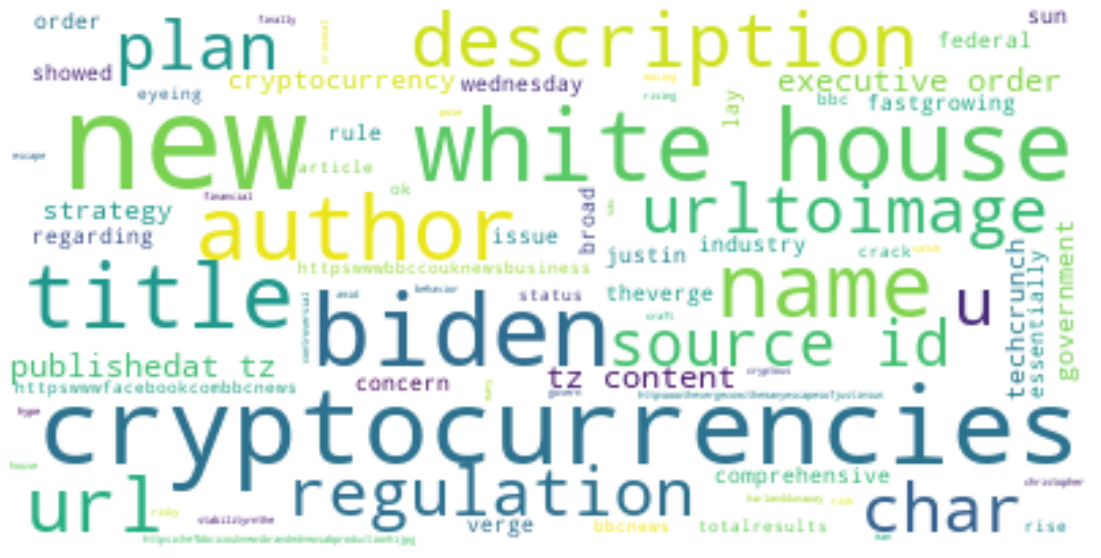

In [851]:
# Generate the Bitcoin word cloud

word_cloud_tokenizer(all_bitcoin_articles)

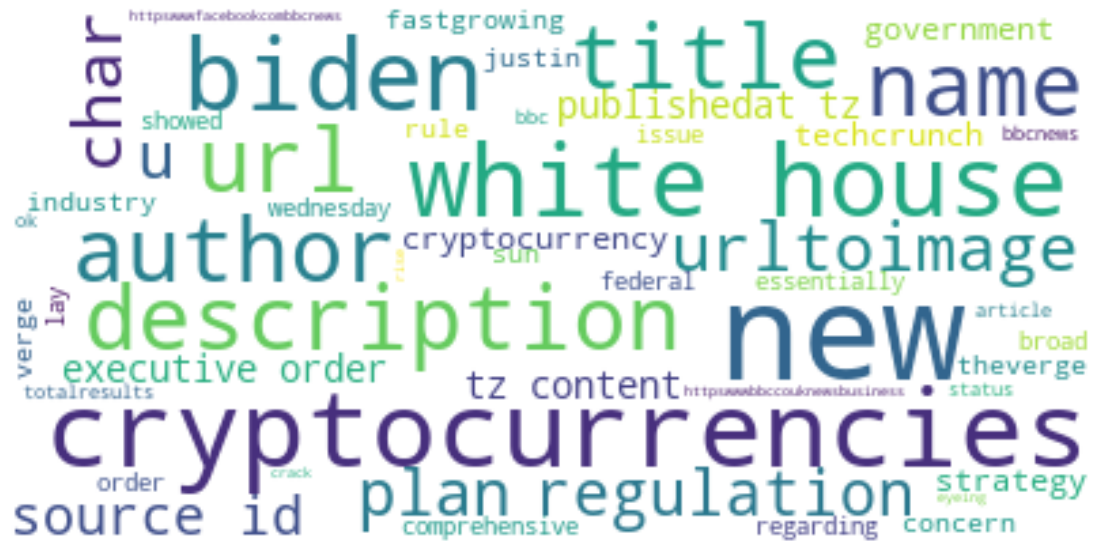

In [852]:
# Generate the Ethereum word cloud

word_cloud_tokenizer(all_eth_articles)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [853]:
import spacy
from spacy import displacy

In [854]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm


In [855]:
# Load the spaCy model

def most_commun_describers(text): 
    """making a funtion to get the a list of the most 
    comunt adjetive and plot a wordcloud of those words
    to easy visialisation
    as the input it takes a json files as the text""" 
    nlp = spacy.load('en_core_web_sm')
    all_bitcoin_sentences = json.dumps(text)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', all_bitcoin_sentences)
    sw = set(stopwords.words('english'))
    new_bitcoin_tokens = nlp(re_clean)
    #displacy.render(new_bitcoin_tokens, style="ent")
    adjs = [token.text.lower() for token in new_bitcoin_tokens if token.pos_ == 'ADJ']
    most_freq_adjectives = Counter(adjs).most_common(20)
    print(most_freq_adjectives)
    str_freq_adjs = json.dumps(most_freq_adjectives)
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_freq_adjs)
    plot = plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    return plot

[('new', 5), ('url', 2), ('comprehensive', 2), ('federal', 2), ('broad', 2), ('financial', 1), ('many', 1), ('risky', 1), ('cryptous', 1), ('controversial', 1), ('chinese', 1), ('shiny', 1), ('lofted', 1), ('early', 1), ('executive', 1), ('other', 1), ('first', 1), ('crypto', 1), ('multiple', 1), ('d', 1)]


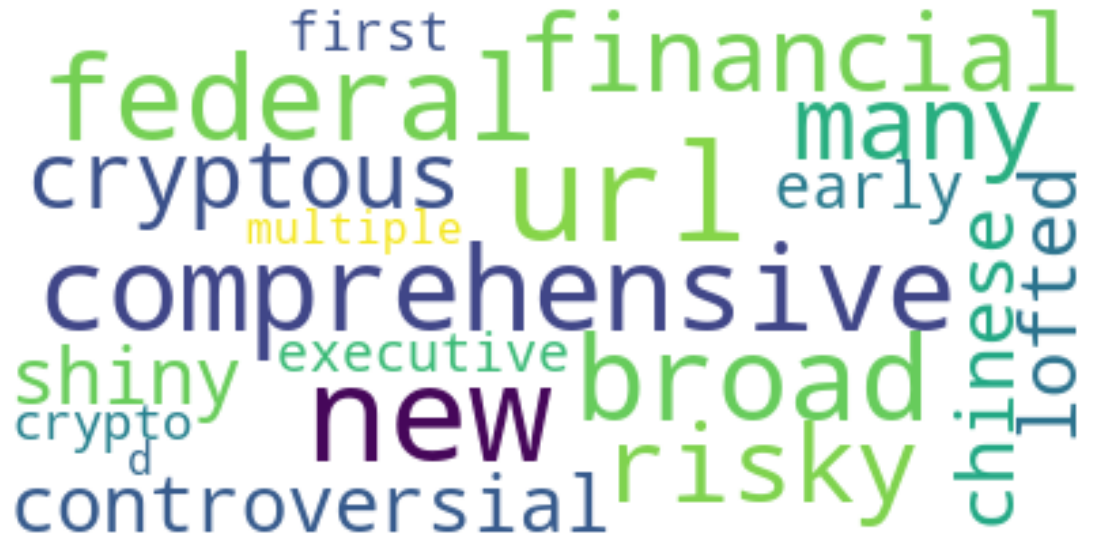

In [856]:
most_commun_describers(all_bitcoin_articles)

### Bitcoin NER

In [857]:
# Concatenate all of the Bitcoin text together
ner_bitcoin_articles = json.dumps(all_bitcoin_articles)

In [858]:
# Run the NER processor on all of the text
def named_entity_recongnition(text): 
    """making a funtion to extract the organisations and contries mention en the articles,
    the function take only on argument "text = json".
    """ 
    nlp = spacy.load('en_core_web_sm')
    all_bitcoin_sentences = json.dumps(text)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', all_bitcoin_sentences)
    sw = set(stopwords.words('english'))
    new_bitcoin_tokens = nlp(re_clean)
    displacy.render(new_bitcoin_tokens, style="ent")
    entities = [ent.text for ent in new_bitcoin_tokens.ents if ent.label_ in ['GPE', 'ORG']]
    print(entities)
    return plot


In [859]:
# Render the visualization
named_entity_recongnition(all_bitcoin_articles)

['BBC News', 'US', 'US', 'TZ', 'US', 'White House', 'Verge', 'TZ', 'Verge', 'White House', 'Bitcoin Ethereum', 'httpscdnvoxcdncomthumborwlrukYwwVmEYcitjRoLRxxfitinxcdnvoxcdncomuploadschorusassetfileeojpg', 'TZ', 'House', 'TechCrunch', 'White House', 'Executive Order', 'White House', 'Executive Order', 'the United Statesu', 'TZ', 'White House', 'Executive Order']


---

### Ethereum NER

In [860]:

named_entity_recongnition(all_eth_articles)

['Verge', 'Ethereum Name Service', 'Ethereum Name Service', 'ENS', 'ENS', 'TZ', 'Ethereum Name Service', 'Verge', 'Polygon', 'Behance', 'TZ', 'Polygon', 'VergernAdobes', 'Behance', 'Polygon', 'Verge', 'White House', 'Bitcoin Ethereum', 'httpscdnvoxcdncomthumborwlrukYwwVmEYcitjRoLRxxfitinxcdnvoxcdncomuploadschorusassetfileeojpg', 'TZ', 'House', 'TechCrunch', 'DeFi', 'DeFi', 'DeFi', 'DeFi', 'TZ', 'Decentralized', 'DeFi', 'DeFi']


---